In [1]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New Dataset/Tomato Disease Leaf/train'
valid_path = '/content/drive/MyDrive/New Dataset/Tomato Disease Leaf/val'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/New Dataset/Tomato Disease Leaf/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Dataset/Tomato Disease Leaf/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1973 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Dataset/Tomato Disease Leaf/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 700 images belonging to 10 classes.


In [14]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
62/62 [==============================] - 584s 9s/step - loss: 8.5737 - accuracy: 0.4384 - val_loss: 2.9749 - val_accuracy: 0.6129
Epoch 2/20
62/62 [==============================] - 318s 5s/step - loss: 1.5903 - accuracy: 0.7344 - val_loss: 2.4546 - val_accuracy: 0.6543
Epoch 3/20
62/62 [==============================] - 317s 5s/step - loss: 1.5110 - accuracy: 0.7461 - val_loss: 1.9366 - val_accuracy: 0.7100
Epoch 4/20
62/62 [==============================] - 321s 5s/step - loss: 1.1468 - accuracy: 0.7993 - val_loss: 2.6204 - val_accuracy: 0.6543
Epoch 5/20
62/62 [==============================] - 316s 5s/step - loss: 1.0636 - accuracy: 0.8180 - val_loss: 3.2020 - val_accuracy: 0.6500
Epoch 6/20
62/62 [==============================] - 318s 5s/step - loss: 1.1204 - accuracy: 0.8332 - val_loss: 2.5944 - val_accuracy: 0.7000
Epoch 7/20
62/62 [==============================] - 317s 5s/step - loss: 0.8276 - accuracy: 0.8662 - val_loss: 2.5483 - val_accuracy: 0.7029
Epoch 8/20
62

In [15]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

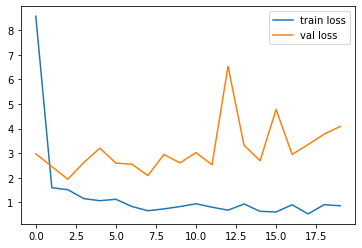

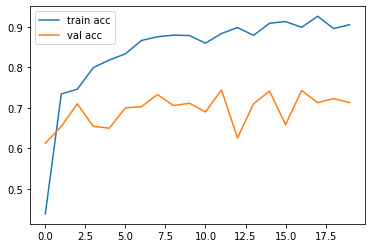

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot the Loss and Accuracy
# Loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
y_pred = model.predict(test_set)
y_pred

22/22 [==============================] - 84s 4s/step


array([[2.27924023e-24, 4.38721327e-05, 9.99956071e-01, ...,
        2.30037688e-18, 4.96867277e-27, 0.00000000e+00],
       [1.11582285e-23, 6.82070096e-18, 9.99999940e-01, ...,
        1.08749978e-15, 1.14749419e-23, 1.07958930e-36],
       [7.27584260e-22, 9.30625677e-01, 4.43306863e-06, ...,
        6.28241757e-22, 1.18635878e-29, 0.00000000e+00],
       ...,
       [1.04513356e-06, 2.88214649e-14, 3.63498520e-09, ...,
        3.83225451e-10, 4.94393796e-22, 3.71677329e-17],
       [3.73488855e-16, 8.06995999e-18, 1.13134053e-08, ...,
        5.17366150e-09, 8.51863517e-18, 4.41157220e-28],
       [3.63953138e-11, 9.97951065e-06, 7.84583390e-03, ...,
        2.27168501e-12, 3.38144487e-20, 5.03049468e-23]], dtype=float32)